In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split

In [5]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Metaprotein\Metaprotein_Pre_processed.csv"
df = pd.read_csv(path)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,Patient.Type
0,25,0,98,0,0,0,0,0,0,0,...,0,0,0,16,0,0,0,1,31,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,C
2,96,2,19,0,0,0,0,0,0,3,...,0,0,0,9,0,0,0,0,0,C
3,0,0,16,0,0,0,0,0,0,0,...,0,0,0,12,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,0,0,0,0,0,C
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,0,C
6,0,0,1,2,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,C
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,C
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,0,0,0,0,0,C
9,0,0,0,0,0,0,0,0,0,0,...,5,0,0,9,0,0,0,0,0,C


In [6]:
df.shape

(48, 2970)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 2970 entries, 1 to Patient.Type
dtypes: int64(2969), object(1)
memory usage: 1.1+ MB


In [8]:
df.values

array([[25, 0, 98, ..., 1, 31, 'C'],
       [0, 0, 0, ..., 0, 0, 'C'],
       [96, 2, 19, ..., 0, 0, 'C'],
       ...,
       [0, 0, 0, ..., 0, 7, 'UC'],
       [0, 0, 0, ..., 0, 8, 'UC'],
       [0, 0, 0, ..., 0, 10, 'UC']], dtype=object)

In [9]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000
mean,2.875000,1.354167,28.500000,0.229167,0.145833,0.083333,0.145833,0.104167,0.104167,1.708333,...,0.083333,1.708333,0.0,0.041667,7.875000,0.020833,0.020833,0.0,0.020833,4.937500
std,14.313548,3.623150,160.372704,0.660096,0.583080,0.403882,0.583080,0.424744,0.721688,4.556773,...,0.577350,2.617115,0.0,0.288675,5.452405,0.144338,0.144338,0.0,0.144338,6.442565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,0.000000,0.0,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.0,0.000000,11.250000,0.000000,0.000000,0.0,0.000000,7.250000
max,96.000000,17.000000,1111.000000,3.000000,3.000000,2.000000,3.000000,2.000000,5.000000,18.000000,...,4.000000,8.000000,0.0,2.000000,21.000000,1.000000,1.000000,0.0,1.000000,31.000000


In [10]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '2961', '2962', '2963', '2964', '2965', '2966', '2967', '2968', '2969',
       'Patient.Type'],
      dtype='object', length=2970)

In [11]:
df['Patient.Type']

0      C
1      C
2      C
3      C
4      C
5      C
6      C
7      C
8      C
9      C
10     C
11     C
12     C
13     C
14     C
15     C
16     C
17     C
18     C
19     C
20    CD
21    CD
22    CD
23    CD
24    CD
25    CD
26    CD
27    CD
28    CD
29    CD
30    CD
31    CD
32    CD
33    UC
34    UC
35    UC
36    UC
37    UC
38    UC
39    UC
40    UC
41    UC
42    UC
43    UC
44    UC
45    UC
46    UC
47    UC
Name: Patient.Type, dtype: object

In [12]:
df['Patient.Type'].value_counts()

C     20
UC    15
CD    13
Name: Patient.Type, dtype: int64

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


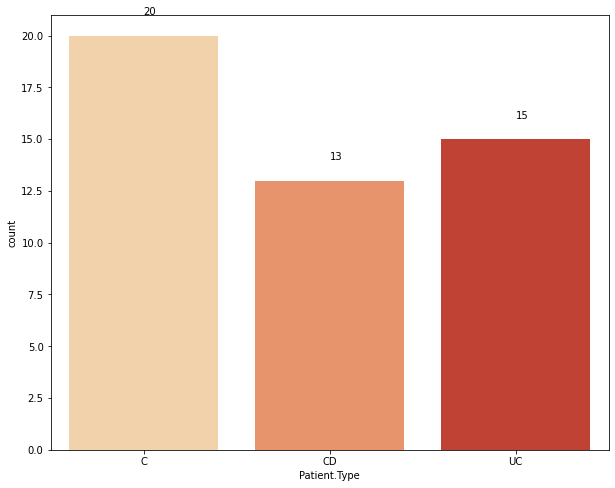

In [13]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Patient.Type'], palette='OrRd')
ax.set_xticklabels(['C','CD','UC'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [14]:
x = df.iloc[:,:-1]
x

,1,2,3,4,5,6,7,8,9,10,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969
0,25,0,98,0,0,0,0,0,0,0,...,0,0,0,0,16,0,0,0,1,31
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
2,96,2,19,0,0,0,0,0,0,3,...,0,0,0,0,9,0,0,0,0,0
3,0,0,16,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,0
6,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,9,0,0,0,0,0


In [15]:
y = df.iloc[:,-1]
y

0      C
1      C
2      C
3      C
4      C
5      C
6      C
7      C
8      C
9      C
10     C
11     C
12     C
13     C
14     C
15     C
16     C
17     C
18     C
19     C
20    CD
21    CD
22    CD
23    CD
24    CD
25    CD
26    CD
27    CD
28    CD
29    CD
30    CD
31    CD
32    CD
33    UC
34    UC
35    UC
36    UC
37    UC
38    UC
39    UC
40    UC
41    UC
42    UC
43    UC
44    UC
45    UC
46    UC
47    UC
Name: Patient.Type, dtype: object

Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,stratify=y)

In [18]:
DT = DecisionTreeClassifier(criterion="entropy")
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print('DecisionTree  accuracy %s' % accuracy_score(y_test, y_pred))

DecisionTree  accuracy 0.6666666666666666


In [19]:
results = confusion_matrix(y_test, y_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  5
TP  1
FN  0
FP  0
[[5 0 0]
 [0 1 2]
 [1 1 2]]


Confusion matrix, without normalization
[[5 0 0]
 [0 1 2]
 [1 1 2]]


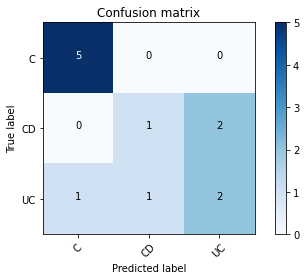

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [21]:
DT = DecisionTreeClassifier(criterion="gini")
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print('DecisionTree  accuracy %s' % accuracy_score(y_test, y_pred))

DecisionTree  accuracy 0.6666666666666666


In [22]:
results = confusion_matrix(y_test, y_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  5
TP  1
FN  0
FP  0
[[5 0 0]
 [0 1 2]
 [1 1 2]]


Confusion matrix, without normalization
[[5 0 0]
 [0 1 2]
 [1 1 2]]


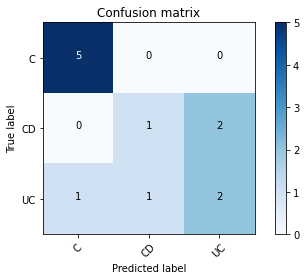

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

Decision tree on separate training and test data

In [25]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Metaprotein\Training Dataset.csv"
dfTrain = pd.read_csv(path)
dfTrain.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2961,X2962,X2963,X2964,X2965,X2966,X2967,X2968,X2969,Patient.Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,0,0,0,0,0,C
1,0,0,25,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,UC
2,0,0,0,0,0,0,0,0,0,0,...,5,0,0,9,0,0,0,0,0,C
3,0,0,0,0,2,0,2,1,0,17,...,0,0,0,0,0,0,0,0,0,CD
4,0,0,0,0,0,0,0,0,0,0,...,6,0,0,4,0,0,0,0,13,CD
5,0,0,1,2,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,C
6,0,0,9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,7,UC
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,19,0,0,0,0,7,CD
8,0,2,40,0,0,0,0,0,0,0,...,0,0,0,21,0,1,0,0,5,UC
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,CD


In [26]:
dfTrain['Patient.Type'].value_counts()

C     11
CD     7
UC     6
Name: Patient.Type, dtype: int64

In [27]:
x_train = dfTrain.iloc[:,:-1]
x_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2960,X2961,X2962,X2963,X2964,X2965,X2966,X2967,X2968,X2969
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
1,0,0,25,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,9,0,0,0,0,0
3,0,0,0,0,2,0,2,1,0,17,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,4,0,0,0,0,13
5,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
6,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,19,0,0,0,0,7
8,0,2,40,0,0,0,0,0,0,0,...,0,0,0,0,21,0,1,0,0,5
9,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,2


In [28]:
y_train = dfTrain.iloc[:,-1]
y_train

0      C
1     UC
2      C
3     CD
4     CD
5      C
6     UC
7     CD
8     UC
9     CD
10    UC
11    CD
12     C
13     C
14     C
15     C
16     C
17     C
18    UC
19    UC
20    CD
21     C
22    CD
23     C
Name: Patient.Type, dtype: object

In [29]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Metaprotein\Testing Dataset.csv"
dfTest = pd.read_csv(path)
dfTest.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2961,X2962,X2963,X2964,X2965,X2966,X2967,X2968,X2969,Patient.Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,C
1,96,2,19,0,0,0,0,0,0,3,...,0,0,0,9,0,0,0,0,0,C
2,0,0,16,0,0,0,0,0,0,0,...,0,0,0,12,0,0,0,0,0,C
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,0,C
5,0,0,0,0,0,0,0,0,0,0,...,3,0,0,6,0,0,0,0,0,C
6,0,0,0,2,0,0,0,0,0,0,...,0,0,0,12,0,0,0,0,0,C
7,4,12,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,C
8,0,3,1,0,0,0,0,0,0,0,...,3,0,0,14,0,0,0,0,0,C
9,0,0,0,0,3,2,3,2,0,18,...,0,0,0,0,0,0,0,0,0,CD


In [30]:
dfTest['Patient.Type'].value_counts()

C     9
UC    9
CD    6
Name: Patient.Type, dtype: int64

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


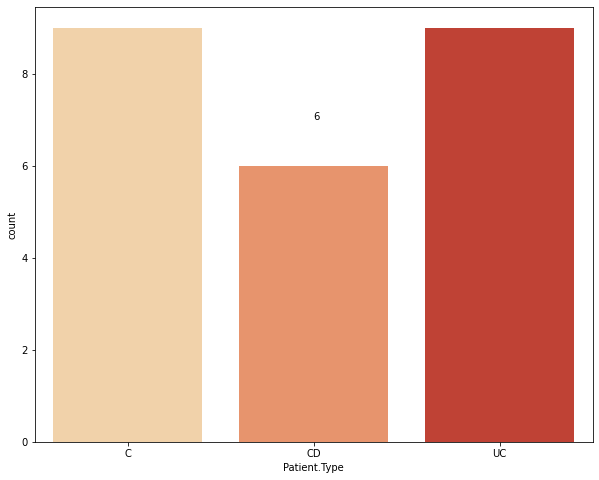

In [31]:
plt.figure(figsize=(10,8))
ax=sns.countplot(dfTest['Patient.Type'], palette='OrRd')
ax.set_xticklabels(['C','CD','UC'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [33]:
x_test = dfTest.iloc[:,:-1]
x_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2960,X2961,X2962,X2963,X2964,X2965,X2966,X2967,X2968,X2969
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
1,96,2,19,0,0,0,0,0,0,3,...,0,0,0,0,9,0,0,0,0,0
2,0,0,16,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,6,0,0,0,0,0
6,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,0,0
7,4,12,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
8,0,3,1,0,0,0,0,0,0,0,...,0,3,0,0,14,0,0,0,0,0
9,0,0,0,0,3,2,3,2,0,18,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_test = dfTest.iloc[:,-1]
y_test

0      C
1      C
2      C
3      C
4      C
5      C
6      C
7      C
8      C
9     CD
10    CD
11    CD
12    CD
13    CD
14    CD
15    UC
16    UC
17    UC
18    UC
19    UC
20    UC
21    UC
22    UC
23    UC
Name: Patient.Type, dtype: object

In [35]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((24, 2969), (24,), (24, 2969), (24,))

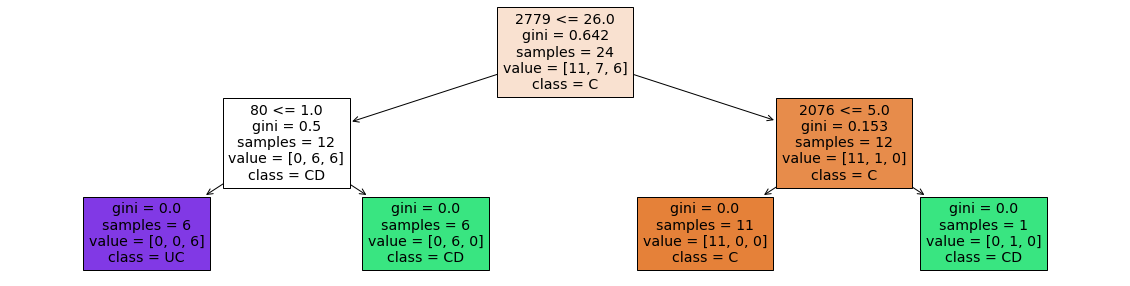

In [84]:
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [85]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

Accuracy Score-Train:  1.0


In [86]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Test:  0.7083333333333334


Confusion matrix, without normalization
[[9 0 0]
 [2 4 0]
 [1 4 4]]


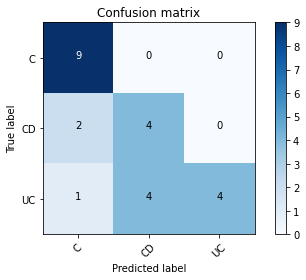

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

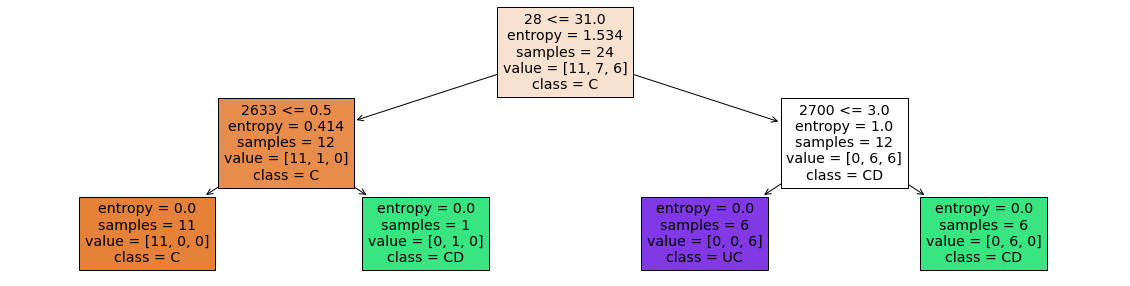

In [40]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [43]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

Accuracy Score-Train:  1.0


In [42]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.7916666666666666


Confusion matrix, without normalization
[[9 0 0]
 [0 6 0]
 [1 4 4]]


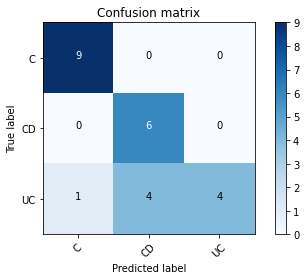

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

Pruned Trees

In [ ]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=1)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

Evaluating model performance

In [ ]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

In [ ]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 2, max_leaf_nodes = 3)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [ ]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

In [ ]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()